# **IMPORTING NECESSARY LIBRARIES**

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **READING DATASET**

In [5]:
df = pd.read_csv("./Features/all_features.csv")
df.head()

Unnamed: 0                                          Song_Name  \
0           0  Aditi Singh Sharma - High Rated Gabru (Female ...   
1           1  Amaal Mallik - Zero Hour Mashup 2015(Remix By ...   
2           2        Anirudh Ravichander - Pori Pathi Vizhum.mp3   
3           3                        Badshah - Proper Patola.mp3   
4           4                     Badshah - She Move It Like.mp3   

   onset_strength  chroma_stft  chroma_cqt  chroma_cens  melspectrogram  \
0        1.558583     0.399325    0.501640     0.249157        7.062729   
1        1.370409     0.422881    0.475017     0.241708       18.979590   
2        1.475866     0.409791    0.491423     0.249568        7.932009   
3        1.595038     0.422150    0.485531     0.252525       12.572222   
4        1.620642     0.483835    0.365514     0.223681       14.925961   

       mfcc  spectral_centroid  spectral_bandwidth  spectral_contrast  \
0 -1.811182        2512.244015         2745.921532          21.380764   
1  4.403271        2641.350377         3498.785676          20.644559   
2  0.533828        3406.636170         3659.061440          20.396372   
3 -1.048275        3269.611281         3610.420577          20.391510   
4  1.051512        2836.057656         3116.927351          21.290714   

   spectral_rolloff   tonnetz  zero_crossing_rate  labels  
0       5197.796266  0.015492            0.054281       0  
1       6072.479538  0.014796            0.042882       0  
2       7632.464878  0.008711            0.068220       0  
3       7358.119696 -0.014358            0.066408       0  
4       6203.393641  0.050846            0.056044       0

# **CHECKING CORRELATION**

In [3]:
df.corr()

Unnamed: 0  onset_strength  chroma_stft  chroma_cqt  \
Unnamed: 0            1.000000       -0.134453    -0.329427    0.360360   
onset_strength       -0.134453        1.000000     0.306147    0.560118   
chroma_stft          -0.329427        0.306147     1.000000    0.080732   
chroma_cqt            0.360360        0.560118     0.080732    1.000000   
chroma_cens           0.288172        0.616692     0.048343    0.958787   
melspectrogram        0.148096        0.256602     0.370628    0.228904   
mfcc                  0.153623        0.162230     0.490240    0.218057   
spectral_centroid     0.158121        0.443019     0.211048    0.464607   
spectral_bandwidth    0.258346        0.229908     0.228432    0.340452   
spectral_contrast    -0.003908       -0.252082    -0.478723   -0.371778   
spectral_rolloff      0.157040        0.365593     0.258764    0.401088   
tonnetz               0.017011       -0.024568     0.023690   -0.070887   
zero_crossing_rate    0.059414        0.494943     0.051075    0.493546   
labels                0.988149       -0.126809    -0.288654    0.357206   

                    chroma_cens  melspectrogram      mfcc  spectral_centroid  \
Unnamed: 0             0.288172        0.148096  0.153623           0.158121   
onset_strength         0.616692        0.256602  0.162230           0.443019   
chroma_stft            0.048343        0.370628  0.490240           0.211048   
chroma_cqt             0.958787        0.228904  0.218057           0.464607   
chroma_cens            1.000000        0.180268  0.163795           0.427986   
melspectrogram         0.180268        1.000000  0.740597           0.262917   
mfcc                   0.163795        0.740597  1.000000           0.342768   
spectral_centroid      0.427986        0.262917  0.342768           1.000000   
spectral_bandwidth     0.283961        0.308028  0.454280           0.880440   
spectral_contrast     -0.287351       -0.497796 -0.300024          -0.187830   
spectral_rolloff       0.354862        0.283500  0.409550           0.977982   
tonnetz               -0.085649        0.055276  0.047735          -0.010567   
zero_crossing_rate     0.491139        0.088251  0.104698           0.870795   
labels                 0.279969        0.176078  0.182927           0.176022   

                    spectral_bandwidth  spectral_contrast  spectral_rolloff  \
Unnamed: 0                    0.258346          -0.003908          0.157040   
onset_strength                0.229908          -0.252082          0.365593   
chroma_stft                   0.228432          -0.478723          0.258764   
chroma_cqt                    0.340452          -0.371778          0.401088   
chroma_cens                   0.283961          -0.287351          0.354862   
melspectrogram                0.308028          -0.497796          0.283500   
mfcc                          0.454280          -0.300024          0.409550   
spectral_centroid             0.880440          -0.187830          0.977982   
spectral_bandwidth            1.000000          -0.178400          0.923046   
spectral_contrast            -0.178400           1.000000         -0.178915   
spectral_rolloff              0.923046          -0.178915          1.000000   
tonnetz                       0.030937           0.031689         -0.010384   
zero_crossing_rate            0.563755          -0.102621          0.778134   
labels                        0.281635          -0.027069          0.179154   

                     tonnetz  zero_crossing_rate    labels  
Unnamed: 0          0.017011            0.059414  0.988149  
onset_strength     -0.024568            0.494943 -0.126809  
chroma_stft         0.023690            0.051075 -0.288654  
chroma_cqt         -0.070887            0.493546  0.357206  
chroma_cens        -0.085649            0.491139  0.279969  
melspectrogram      0.055276            0.088251  0.176078  
mfcc                0.047735            0.104698  0.182927  
spectral_centroid  

<AxesSubplot:>

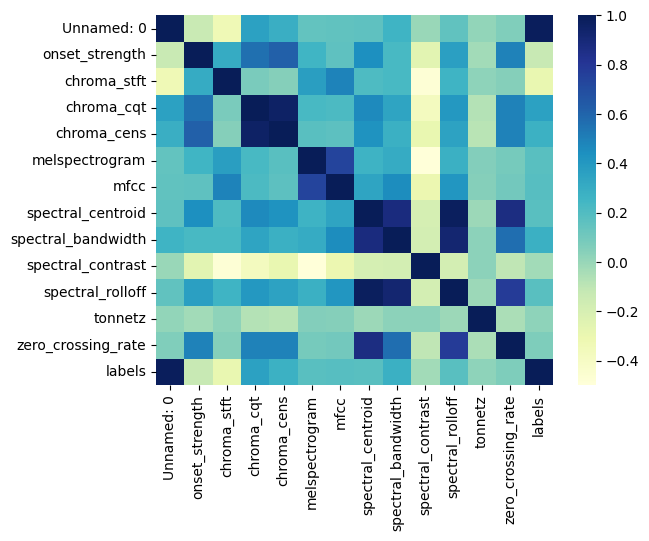

In [4]:
#Correlation Matrix
sns.heatmap(df.corr(), 
            cmap = "YlGnBu")

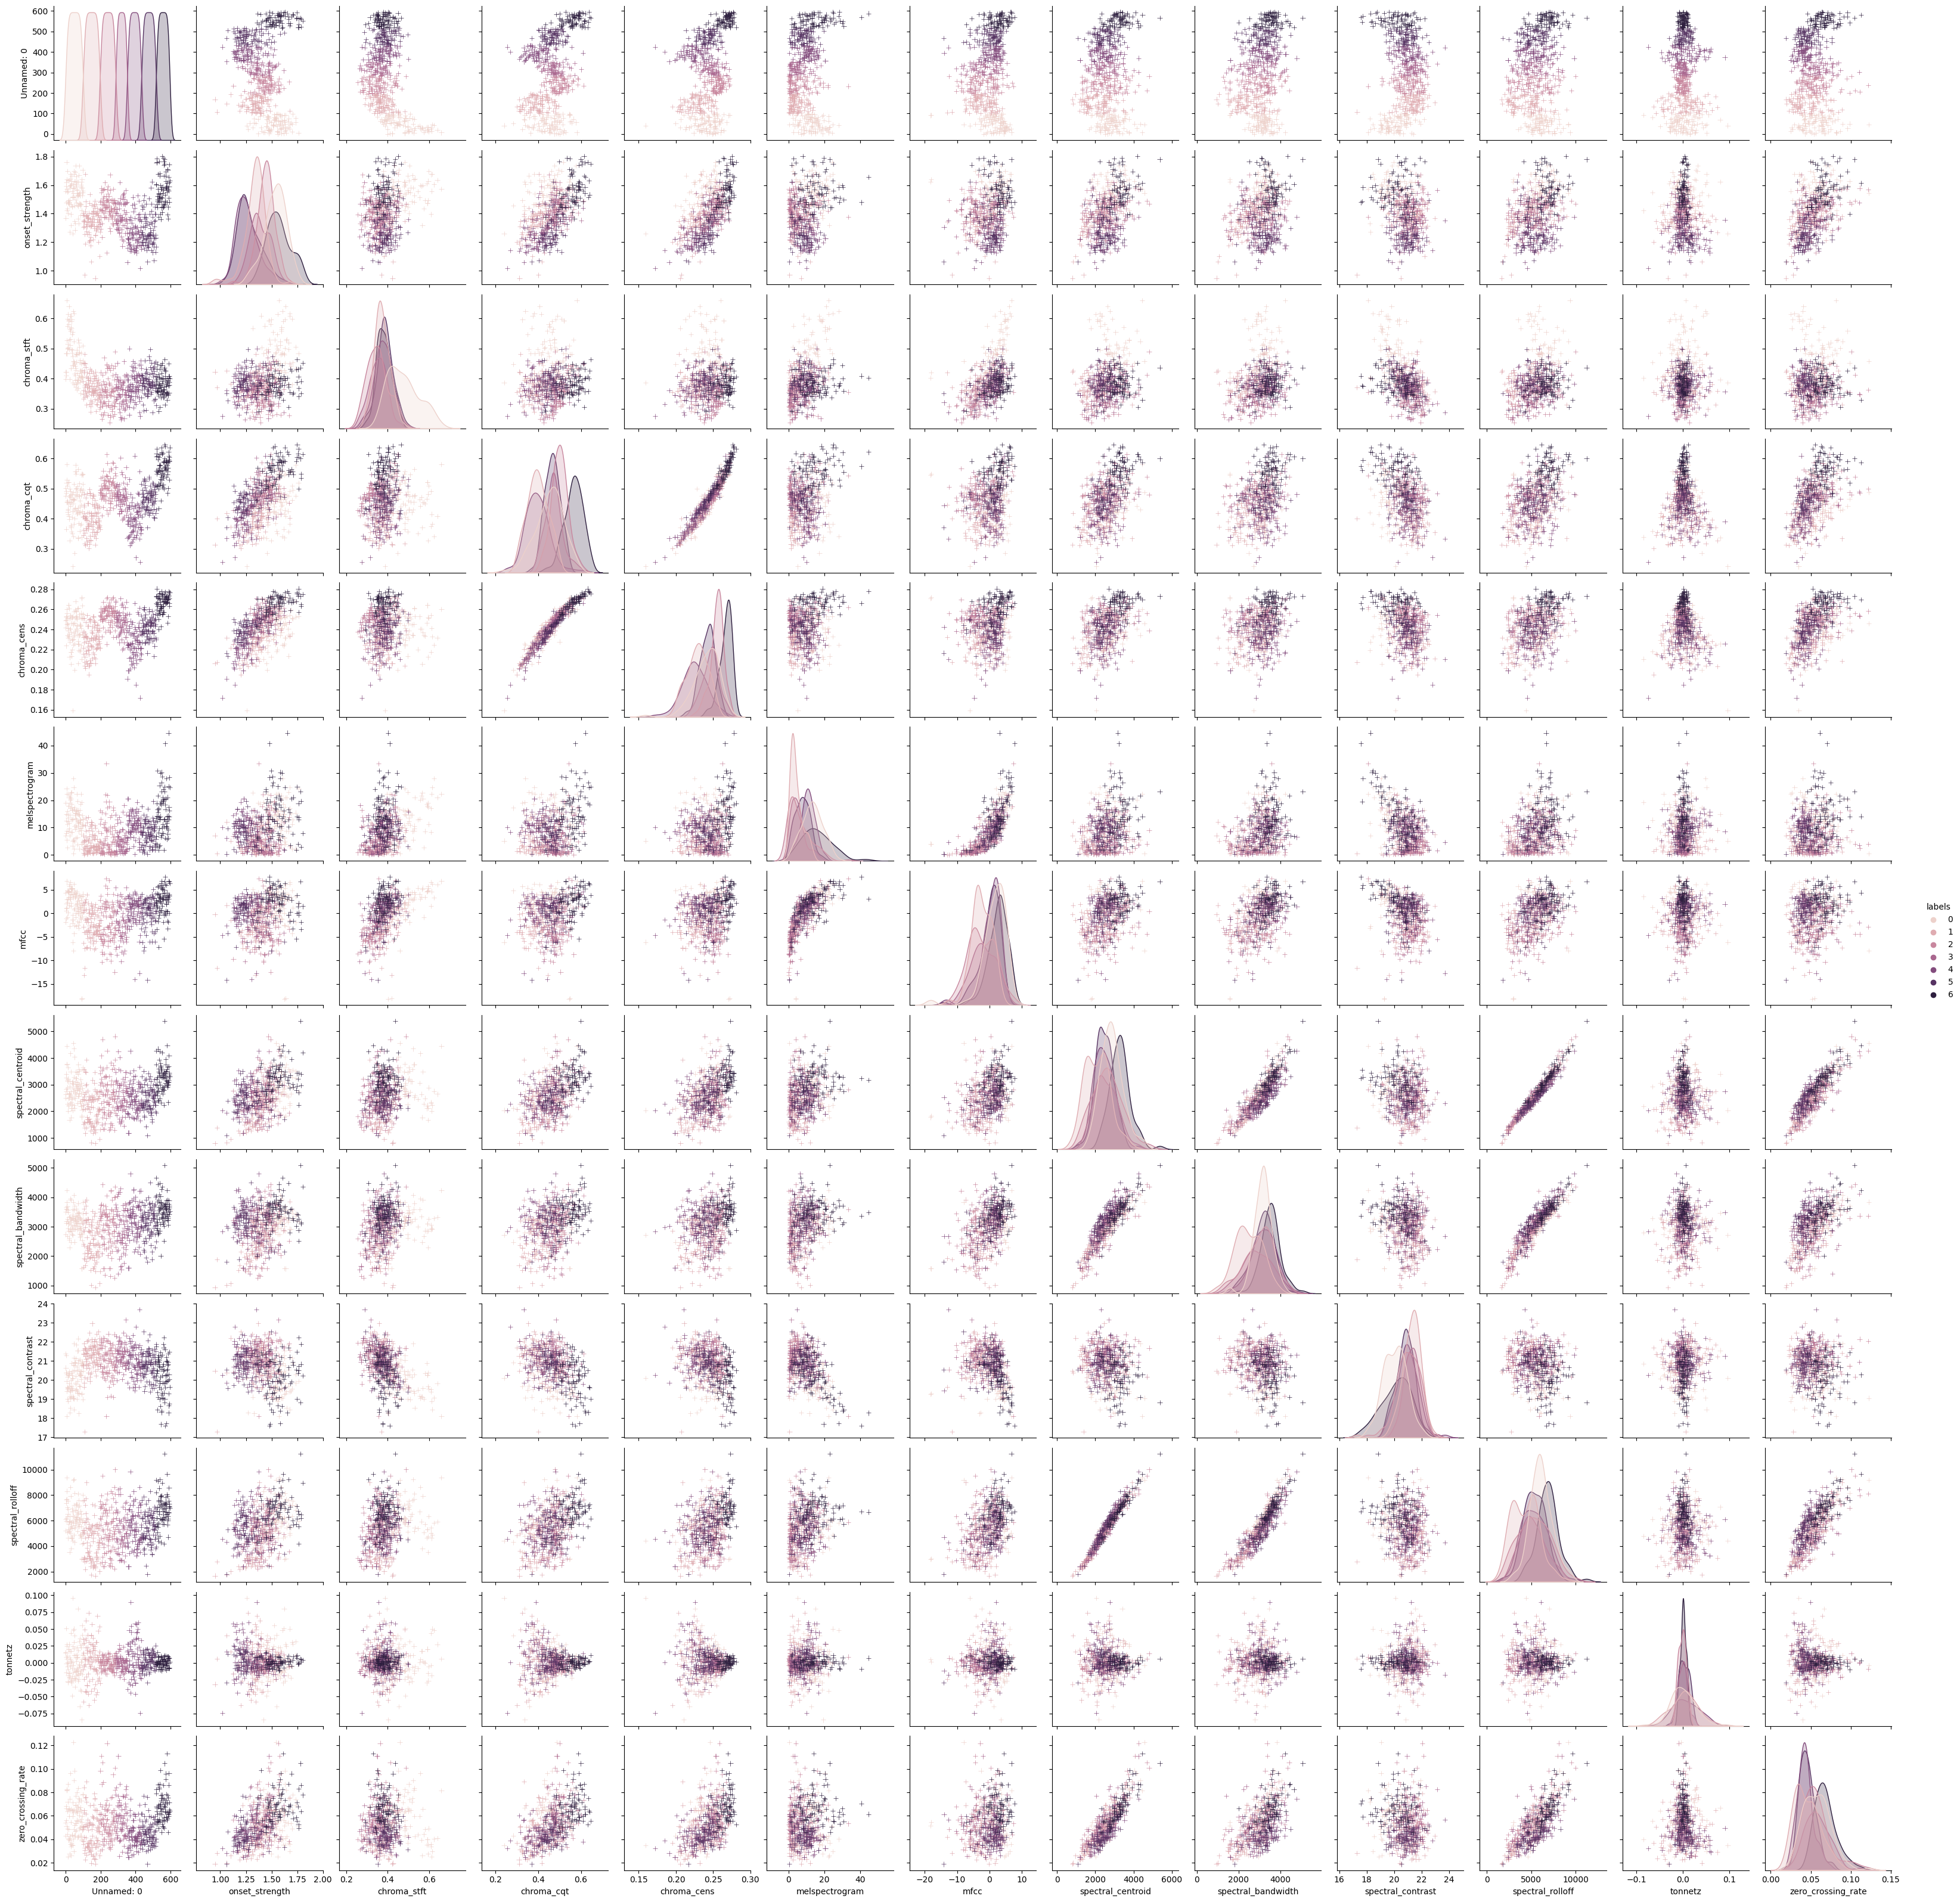

In [15]:
g = sns.pairplot(df, hue='labels', markers='+')
plt.show()

In [6]:
def get_data(df):

  # shuffle the DataFrame rows 
  df = df.sample(frac = 1)

  col = list(df.columns)
  X = df[col[2:-1]]
  X = X.to_numpy()
    
  y = df["labels"].to_numpy().flatten()

  return X, y

In [7]:
X, y = get_data(df)

In [8]:
len(X)

596

# **PCA**

In [8]:
# Standardize the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
X_scaled = scaler.transform(X)
X_scaled = X


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)

In [10]:
pca.fit(X_scaled)

PCA(n_components=12)

In [11]:
print("dimensions reduced to : ", pca.n_components_)
print("Variance ratio for each PC :", pca.explained_variance_ratio_)

dimensions reduced to :  12
Variance ratio for each PC : [9.77686185e-01 1.80283073e-02 4.27007256e-03 1.38924461e-05
 1.35900841e-06 1.78085663e-07 4.28766186e-09 1.00807676e-09
 4.49853815e-10 1.18906563e-10 5.87788336e-12 2.88006437e-12]


In [12]:
# Apply the mapping (transform) to X
X_pca = pca.transform(X_scaled)

In [13]:
# now finding correaltion
X_pandas = pd.DataFrame(X_pca)
X_pandas.corr(method ='pearson')

0             1             2             3             4   \
0   1.000000e+00  5.379497e-16  1.141084e-15  6.565469e-16 -5.174151e-16   
1   5.379497e-16  1.000000e+00 -5.784662e-16 -8.616598e-17 -5.148078e-16   
2   1.141084e-15 -5.784662e-16  1.000000e+00 -1.991699e-15 -9.522024e-17   
3   6.565469e-16 -8.616598e-17 -1.991699e-15  1.000000e+00 -5.076193e-16   
4  -5.174151e-16 -5.148078e-16 -9.522024e-17 -5.076193e-16  1.000000e+00   
5  -3.089995e-15  2.498960e-15  4.192700e-15  7.499187e-16 -1.638835e-15   
6  -3.075987e-13 -8.666146e-14 -7.340745e-14 -1.710735e-14  6.935696e-14   
7  -1.440513e-13  6.850766e-13  8.392349e-13  4.435622e-14 -4.171357e-13   
8   5.488285e-12  1.879783e-12  2.000017e-12  2.674880e-13 -1.267808e-12   
9   5.176226e-14  5.162573e-14  6.327967e-14  5.066274e-15 -4.116771e-14   
10  1.525366e-12  5.565689e-12  1.508230e-12 -6.172812e-14 -8.441500e-13   
11 -2.244662e-12 -1.113824e-12 -1.395722e-12 -1.546123e-14  4.089414e-13   

              5             6             7             8             9   \
0  -3.089995e-15 -3.075987e-13 -1.440513e-13  5.488285e-12  5.176226e-14   
1   2.498960e-15 -8.666146e-14  6.850766e-13  1.879783e-12  5.162573e-14   
2   4.192700e-15 -7.340745e-14  8.392349e-13  2.000017e-12  6.327967e-14   
3   7.499187e-16 -1.710735e-14  4.435622e-14  2.674880e-13  5.066274e-15   
4  -1.638835e-15  6.935696e-14 -4.171357e-13 -1.267808e-12 -4.116771e-14   
5   1.000000e+00  2.272950e-14  1.948947e-14 -1.507158e-14  2.590038e-15   
6   2.272950e-14  1.000000e+00 -2.182591e-12 -3.215448e-12 -2.390870e-13   
7   1.948947e-14 -2.182591e-12  1.000000e+00 -1.573316e-13  1.630614e-14   
8  -1.507158e-14 -3.215448e-12 -1.573316e-13  1.000000e+00 -3.247889e-14   
9   2.590038e-15 -2.390870e-13  1.630614e-14 -3.247889e-14  1.000000e+00   
10 -1.771310e-13  4.001855e-12  4.156771e-13  7.441554e-13 -1.192911e-14   
11  4.312677e-14 -3.327791e-13 -1.698769e-13 -7.450925e-14 -9.797730e-16   

              10            11  
0   1.525366e-12 -2.244662e-12  
1   5.565689e-12 -1.113824e-12  
2   1.508230e-12 -1.395722e-12  
3  -6.172812e-14 -1.546123e-14  
4  -8.441500e-13  4.089414e-13  
5  -1.771310e-13  4.312677e-14  
6   4.001855e-12 -3.327791e-13  
7   4.156771e-13 -1.698769e-13  
8   7.441554e-13 -7.450925e-14  
9  -1.192911e-14 -9.797730e-16  
10  1.000000e+00 -2.283637e-15  
11 -2.283637e-15  1.000000e+00

# **FEATURE IMPORTANCE**

In [14]:
col = list(df.columns)

X_pandas = df[col[2:-1]]
y_pandas = df["labels"]

[0.12565958 0.10078695 0.12773287 0.10892289 0.09113859 0.06685917
 0.05877568 0.06559119 0.0682131  0.06031853 0.06322325 0.0627782 ]


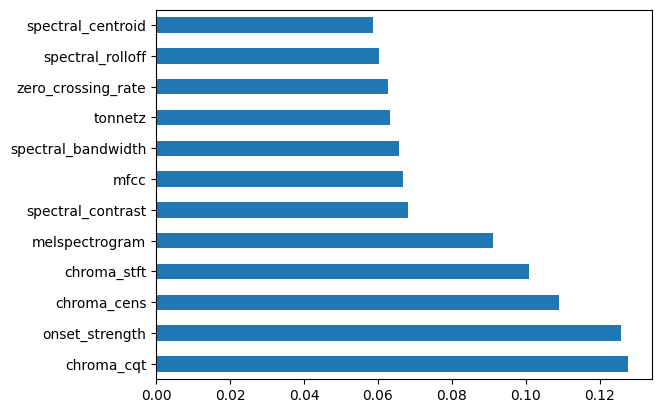

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_pandas,y_pandas)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_pandas.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# WE WILL BE USING REPEATED STRATIFIED K FOLD CROSS VALIDATION

# **SVM**

In [9]:
from itertools import combinations
n_features = X.shape[1]

def get_X_as_per_features(X, features_array):
    new_X = X[:,features_array[0]:features_array[0]+1]
    for i in range(1, len(features_array)):
      feature_no = features_array[i]
      temp = X[:,feature_no:feature_no+1]
      new_X = np.concatenate((new_X, temp), 1)
    
    return new_X


In [10]:
X_train = X

In [18]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
ans2 = []

for r in range(6, 8, 1 ):
    comb = list(combinations(list(range(n_features)),r))

    for c in comb:
      new_X = get_X_as_per_features(X_train, c)

      # defining model
      model = make_pipeline(PCA(len(c)), StandardScaler(), SVC(C = 0.7, gamma='auto', kernel = "rbf", break_ties = True))

      # define evaluation procedure
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

      # evaluate model
      scores = cross_val_score(model, new_X, y, scoring='accuracy', cv=cv, n_jobs=4)

      # summarize performance
      mean_scores = mean(scores)

      print(c, ":", mean_scores)
      ans2.append([mean_scores, scores, c])


(0, 1, 2, 3, 4, 5) : 0.6643697478991596
(0, 1, 2, 3, 4, 6) : 0.6794397759103642
(0, 1, 2, 3, 4, 7) : 0.6828991596638655
(0, 1, 2, 3, 4, 8) : 0.6828991596638656
(0, 1, 2, 3, 4, 9) : 0.6745378151260504
(0, 1, 2, 3, 4, 10) : 0.6694677871148459
(0, 1, 2, 3, 4, 11) : 0.6610784313725491
(0, 1, 2, 3, 5, 6) : 0.6476610644257704
(0, 1, 2, 3, 5, 7) : 0.6543277310924369
(0, 1, 2, 3, 5, 8) : 0.6677871148459383
(0, 1, 2, 3, 5, 9) : 0.6425350140056023
(0, 1, 2, 3, 5, 10) : 0.6543557422969187
(0, 1, 2, 3, 5, 11) : 0.6543837535014007
(0, 1, 2, 3, 6, 7) : 0.6678151260504201
(0, 1, 2, 3, 6, 8) : 0.6526750700280112
(0, 1, 2, 3, 6, 9) : 0.6627450980392157
(0, 1, 2, 3, 6, 10) : 0.6543977591036414
(0, 1, 2, 3, 6, 11) : 0.6778011204481793
(0, 1, 2, 3, 7, 8) : 0.6626890756302521
(0, 1, 2, 3, 7, 9) : 0.662717086834734
(0, 1, 2, 3, 7, 10) : 0.6760364145658263
(0, 1, 2, 3, 7, 11) : 0.6843977591036415
(0, 1, 2, 3, 8, 9) : 0.6559663865546218
(0, 1, 2, 3, 8, 10) : 0.662703081232493
(0, 1, 2, 3, 8, 11) : 0.657633053

# ARRANGING THEM IN SORTED ORDER

In [39]:
ans2.sort(key = lambda x:x[0], reverse=True)

for i in ans2:
  if len(i[2]) == 6:
    print(i)
  

[0.6996498599439777, array([0.70833333, 0.73109244, 0.66386555, 0.69747899, 0.69747899]), (0, 1, 2, 6, 8, 11)]
[0.6963445378151261, array([0.675     , 0.76470588, 0.74789916, 0.68907563, 0.60504202]), (0, 1, 2, 4, 9, 11)]
[0.6946778711484594, array([0.66666667, 0.70588235, 0.71428571, 0.69747899, 0.68907563]), (0, 1, 2, 4, 5, 10)]
[0.6928571428571428, array([0.75      , 0.68067227, 0.69747899, 0.64705882, 0.68907563]), (0, 1, 2, 4, 6, 11)]
[0.6912885154061625, array([0.68333333, 0.66386555, 0.68067227, 0.67226891, 0.75630252]), (0, 1, 2, 8, 9, 11)]
[0.6895238095238095, array([0.73333333, 0.68907563, 0.71428571, 0.63865546, 0.67226891]), (0, 1, 3, 4, 7, 11)]
[0.6879551820728291, array([0.66666667, 0.71428571, 0.71428571, 0.67226891, 0.67226891]), (0, 1, 2, 7, 8, 11)]
[0.6863025210084034, array([0.65      , 0.65546218, 0.73109244, 0.72268908, 0.67226891]), (0, 1, 2, 3, 6, 11)]
[0.6863025210084034, array([0.65      , 0.68907563, 0.67226891, 0.67226891, 0.74789916]), (0, 1, 2, 6, 10, 11)]


In [40]:
ans2

[[0.7146918767507002,
  array([0.75833333, 0.71428571, 0.69747899, 0.63865546, 0.76470588]),
  (0, 1, 2, 4, 6, 10, 11)],
 [0.7131372549019608,
  array([0.68333333, 0.75630252, 0.70588235, 0.65546218, 0.76470588]),
  (0, 1, 2, 3, 4, 7, 11)],
 [0.7130672268907563,
  array([0.725     , 0.70588235, 0.70588235, 0.72268908, 0.70588235]),
  (0, 1, 2, 3, 6, 8, 11)],
 [0.7114425770308124,
  array([0.69166667, 0.7394958 , 0.75630252, 0.67226891, 0.69747899]),
  (0, 1, 2, 4, 6, 7, 10)],
 [0.7113725490196078,
  array([0.73333333, 0.67226891, 0.71428571, 0.68067227, 0.75630252]),
  (0, 1, 2, 3, 7, 10, 11)],
 [0.7112745098039215,
  array([0.79166667, 0.72268908, 0.71428571, 0.69747899, 0.6302521 ]),
  (0, 1, 2, 4, 6, 8, 11)],
 [0.709859943977591,
  array([0.63333333, 0.68907563, 0.70588235, 0.7394958 , 0.78151261]),
  (0, 1, 2, 3, 6, 10, 11)],
 [0.7098039215686274,
  array([0.66666667, 0.72268908, 0.76470588, 0.69747899, 0.69747899]),
  (0, 1, 2, 3, 4, 8, 10)],
 [0.7081232492997198,
  array([0.66666

# **GRADIENT BOOSTING**

**EXTRACTING FEATURES**

In [41]:
from itertools import combinations
n_features = X.shape[1]

def get_X_as_per_features(X, features_array):
    new_X = X[:,features_array[0]:features_array[0]+1]
    for i in range(1, len(features_array)):
      feature_no = features_array[i]
      temp = X[:,feature_no:feature_no+1]
      new_X = np.concatenate((new_X, temp), 1)
    
    return new_X


In [42]:
X_train = X

In [43]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
ans3 = []

for r in range(n_features, 10, -1 ):
    comb = list(combinations(list(range(n_features)),r))

    for c in comb:
      new_X = get_X_as_per_features(X_train, c)

      # defining model
      model = GradientBoostingClassifier(n_estimators = 100)

      # define evaluation procedure
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

      # evaluate model
      scores = cross_val_score(model, new_X, y, scoring='accuracy', cv=cv, n_jobs=4)

      # summarize performance
      mean_scores = mean(scores)

      print(c, ":", mean_scores)
      ans3.append([mean_scores, scores, c])
      
      


(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6593697478991597
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10) : 0.6644957983193278
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11) : 0.664453781512605
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11) : 0.6946078431372549
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11) : 0.6643837535014006
(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11) : 0.6778151260504202
(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11) : 0.697983193277311
(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11) : 0.6577871148459383
(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11) : 0.654327731092437
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6795378151260504
(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6560224089635854
(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6359663865546218
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6089775910364146


In [44]:
# arranging them in the sorted order
ans3.sort(key = lambda x:x[0], reverse=True)
ans3

[[0.697983193277311,
  array([0.7       , 0.69747899, 0.73109244, 0.63865546, 0.72268908]),
  (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)],
 [0.6946078431372549,
  array([0.70833333, 0.72268908, 0.74789916, 0.64705882, 0.64705882]),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11)],
 [0.6795378151260504,
  array([0.675     , 0.69747899, 0.64705882, 0.74789916, 0.6302521 ]),
  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11)],
 [0.6778151260504202,
  array([0.7       , 0.68067227, 0.70588235, 0.65546218, 0.64705882]),
  (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11)],
 [0.6644957983193278,
  array([0.625     , 0.66386555, 0.63865546, 0.68907563, 0.70588235]),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)],
 [0.664453781512605,
  array([0.65      , 0.68067227, 0.66386555, 0.62184874, 0.70588235]),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11)],
 [0.6643837535014006,
  array([0.69166667, 0.61344538, 0.69747899, 0.67226891, 0.64705882]),
  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11)],
 [0.6593697478991597,
  array([0.675     , 0.65546218, 0.67226891, 0.6470

# **KNN**

In [45]:
from itertools import combinations
n_features = X.shape[1]

def get_X_as_per_features(X, features_array):
    new_X = X[:,features_array[0]:features_array[0]+1]
    for i in range(1, len(features_array)):
      feature_no = features_array[i]
      temp = X[:,feature_no:feature_no+1]
      new_X = np.concatenate((new_X, temp), 1)
    
    return new_X


In [46]:
X_train = X

In [47]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
ans = []

for r in range(6, 8, 1 ):
    comb = list(combinations(list(range(n_features)),r))

    for c in comb:
      new_X = get_X_as_per_features(X_train, c)

      # defining model
      model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7, n_jobs=4))

      # define evaluation procedure
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

      # evaluate model
      scores = cross_val_score(model, new_X, y, scoring='accuracy', cv=cv, n_jobs=4)

      # summarize performance
      mean_scores = mean(scores)

      print(c, ":", mean_scores)
      ans.append([mean_scores, scores, c])


(0, 1, 2, 3, 4, 5) : 0.6325350140056024
(0, 1, 2, 3, 4, 6) : 0.6426050420168067
(0, 1, 2, 3, 4, 7) : 0.6425770308123249
(0, 1, 2, 3, 4, 8) : 0.6326750700280113
(0, 1, 2, 3, 4, 9) : 0.6309243697478991
(0, 1, 2, 3, 4, 10) : 0.6292717086834734
(0, 1, 2, 3, 4, 11) : 0.6408543417366948
(0, 1, 2, 3, 5, 6) : 0.6006022408963585
(0, 1, 2, 3, 5, 7) : 0.6242436974789916
(0, 1, 2, 3, 5, 8) : 0.607422969187675
(0, 1, 2, 3, 5, 9) : 0.6107422969187675
(0, 1, 2, 3, 5, 10) : 0.6207282913165266
(0, 1, 2, 3, 5, 11) : 0.6141456582633054
(0, 1, 2, 3, 6, 7) : 0.607450980392157
(0, 1, 2, 3, 6, 8) : 0.6174789915966387
(0, 1, 2, 3, 6, 9) : 0.6023109243697479
(0, 1, 2, 3, 6, 10) : 0.6007282913165266
(0, 1, 2, 3, 6, 11) : 0.6106722689075631
(0, 1, 2, 3, 7, 8) : 0.6073389355742298
(0, 1, 2, 3, 7, 9) : 0.6259103641456583
(0, 1, 2, 3, 7, 10) : 0.6342577030812324
(0, 1, 2, 3, 7, 11) : 0.6409803921568628
(0, 1, 2, 3, 8, 9) : 0.6139495798319328
(0, 1, 2, 3, 8, 10) : 0.6022268907563025
(0, 1, 2, 3, 8, 11) : 0.592240896

In [48]:
# arranging them in the sorted order
ans.sort(key = lambda x:x[0], reverse=True)

for i in ans:
  if len(i[2]) == 6:
    print(i)

[0.6594957983193277, array([0.6       , 0.68907563, 0.65546218, 0.73109244, 0.62184874]), (0, 2, 4, 7, 8, 11)]
[0.6593977591036415, array([0.65833333, 0.6302521 , 0.63865546, 0.68067227, 0.68907563]), (0, 1, 2, 4, 7, 8)]
[0.6577871148459383, array([0.61666667, 0.67226891, 0.60504202, 0.68907563, 0.70588235]), (0, 1, 2, 4, 7, 11)]
[0.6561064425770309, array([0.61666667, 0.6302521 , 0.70588235, 0.67226891, 0.65546218]), (0, 1, 2, 4, 6, 7)]
[0.6542436974789916, array([0.725     , 0.60504202, 0.69747899, 0.60504202, 0.63865546]), (0, 1, 2, 4, 7, 10)]
[0.650952380952381, array([0.68333333, 0.60504202, 0.58823529, 0.65546218, 0.72268908]), (0, 1, 2, 4, 5, 7)]
[0.6493837535014005, array([0.61666667, 0.63865546, 0.59663866, 0.68067227, 0.71428571]), (0, 1, 2, 4, 9, 11)]
[0.6493557422969187, array([0.63333333, 0.59663866, 0.67226891, 0.63865546, 0.70588235]), (0, 1, 2, 4, 7, 9)]
[0.6493137254901961, array([0.65833333, 0.60504202, 0.70588235, 0.6302521 , 0.64705882]), (0, 1, 2, 7, 8, 10)]
[0.647

In [49]:
# arranging them in the sorted order
ans.sort(key = lambda x:x[0], reverse=True)
ans

[[0.6694957983193278,
  array([0.65      , 0.68067227, 0.64705882, 0.68067227, 0.68907563]),
  (0, 1, 2, 4, 7, 10, 11)],
 [0.6678291316526611,
  array([0.64166667, 0.69747899, 0.64705882, 0.67226891, 0.68067227]),
  (0, 1, 2, 4, 6, 7, 10)],
 [0.6677871148459383,
  array([0.66666667, 0.71428571, 0.63865546, 0.62184874, 0.69747899]),
  (0, 1, 2, 4, 7, 8, 11)],
 [0.6661204481792717,
  array([0.65833333, 0.63865546, 0.63865546, 0.68067227, 0.71428571]),
  (0, 1, 2, 4, 6, 10, 11)],
 [0.6644117647058824,
  array([0.675     , 0.6302521 , 0.61344538, 0.6302521 , 0.77310924]),
  (0, 1, 2, 3, 4, 6, 11)],
 [0.662843137254902,
  array([0.60833333, 0.65546218, 0.72268908, 0.63865546, 0.68907563]),
  (0, 1, 2, 4, 7, 9, 11)],
 [0.6627731092436975,
  array([0.65      , 0.67226891, 0.68907563, 0.62184874, 0.68067227]),
  (0, 1, 2, 4, 7, 9, 10)],
 [0.6610924369747899,
  array([0.65      , 0.63865546, 0.67226891, 0.68907563, 0.65546218]),
  (0, 1, 2, 4, 6, 7, 11)],
 [0.6610364145658264,
  array([0.683333

# **LOGISTIC REGRESSION**

In [19]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
ans = []

for r in range(6, 8, 1 ):
    comb = list(combinations(list(range(n_features)),r))

    for c in comb:
      new_X = get_X_as_per_features(X_train, c)

      # defining model
      model = make_pipeline(StandardScaler(), LogisticRegression())

      # define evaluation procedure
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

      # evaluate model
      scores = cross_val_score(model, new_X, y, scoring='accuracy', cv=cv, n_jobs=4)

      # summarize performance
      mean_scores = mean(scores)

      print(c, ":", mean_scores)
      ans.append([mean_scores, scores, c])


(0, 1, 2, 3, 4, 5) : 0.6526470588235294
(0, 1, 2, 3, 4, 6) : 0.6544117647058825
(0, 1, 2, 3, 4, 7) : 0.6710084033613445
(0, 1, 2, 3, 4, 8) : 0.6442857142857144
(0, 1, 2, 3, 4, 9) : 0.6476610644257703
(0, 1, 2, 3, 4, 10) : 0.6476050420168067
(0, 1, 2, 3, 4, 11) : 0.6442717086834733
(0, 1, 2, 3, 5, 6) : 0.652577030812325
(0, 1, 2, 3, 5, 7) : 0.6561344537815126
(0, 1, 2, 3, 5, 8) : 0.6476050420168067
(0, 1, 2, 3, 5, 9) : 0.6409523809523809
(0, 1, 2, 3, 5, 10) : 0.6358683473389355
(0, 1, 2, 3, 5, 11) : 0.6458263305322128
(0, 1, 2, 3, 6, 7) : 0.6527871148459383
(0, 1, 2, 3, 6, 8) : 0.6190896358543417
(0, 1, 2, 3, 6, 9) : 0.620798319327731
(0, 1, 2, 3, 6, 10) : 0.6209243697478992
(0, 1, 2, 3, 6, 11) : 0.6495238095238095
(0, 1, 2, 3, 7, 8) : 0.649467787114846
(0, 1, 2, 3, 7, 9) : 0.6492857142857142
(0, 1, 2, 3, 7, 10) : 0.6360084033613446
(0, 1, 2, 3, 7, 11) : 0.6628011204481793
(0, 1, 2, 3, 8, 9) : 0.629313725490196
(0, 1, 2, 3, 8, 10) : 0.6074229691876751
(0, 1, 2, 3, 8, 11) : 0.61242296918

In [20]:
# arranging them in the sorted order
ans.sort(key = lambda x:x[0], reverse=True)

for i in ans:
  if len(i[2]) == 6:
    print(i)

[0.6912745098039216, array([0.69166667, 0.67226891, 0.70588235, 0.65546218, 0.73109244]), (0, 1, 2, 4, 6, 11)]
[0.6845518207282912, array([0.69166667, 0.73109244, 0.6302521 , 0.65546218, 0.71428571]), (0, 1, 2, 4, 7, 11)]
[0.6745378151260505, array([0.65      , 0.65546218, 0.66386555, 0.67226891, 0.73109244]), (0, 1, 2, 4, 6, 7)]
[0.6728011204481793, array([0.68333333, 0.68067227, 0.68907563, 0.59663866, 0.71428571]), (0, 1, 2, 4, 7, 10)]
[0.6712464985994397, array([0.60833333, 0.73109244, 0.68067227, 0.68067227, 0.65546218]), (0, 1, 2, 5, 6, 7)]
[0.6711064425770308, array([0.69166667, 0.71428571, 0.66386555, 0.6302521 , 0.65546218]), (0, 1, 2, 4, 7, 9)]
[0.6710084033613445, array([0.75      , 0.70588235, 0.57142857, 0.63865546, 0.68907563]), (0, 1, 2, 3, 4, 7)]
[0.6694677871148459, array([0.66666667, 0.63865546, 0.62184874, 0.73109244, 0.68907563]), (0, 1, 2, 6, 8, 11)]
[0.6694257703081232, array([0.69166667, 0.65546218, 0.64705882, 0.68067227, 0.67226891]), (0, 1, 2, 7, 8, 11)]
[0.66

In [21]:
# arranging them in the sorted order
ans.sort(key = lambda x:x[0], reverse=True)
ans

[[0.6979691876750701,
  array([0.70833333, 0.67226891, 0.72268908, 0.67226891, 0.71428571]),
  (0, 1, 2, 4, 6, 10, 11)],
 [0.6929691876750701,
  array([0.68333333, 0.67226891, 0.73109244, 0.70588235, 0.67226891]),
  (0, 1, 2, 5, 8, 9, 11)],
 [0.6912745098039216,
  array([0.69166667, 0.67226891, 0.70588235, 0.65546218, 0.73109244]),
  (0, 1, 2, 4, 6, 11)],
 [0.6895098039215688,
  array([0.74166667, 0.58823529, 0.73109244, 0.69747899, 0.68907563]),
  (0, 1, 2, 4, 5, 9, 11)],
 [0.6880112044817928,
  array([0.63333333, 0.66386555, 0.67226891, 0.7394958 , 0.73109244]),
  (0, 1, 2, 3, 4, 7, 11)],
 [0.6863025210084034,
  array([0.65      , 0.68907563, 0.65546218, 0.71428571, 0.72268908]),
  (0, 1, 2, 3, 4, 6, 11)],
 [0.686218487394958,
  array([0.7       , 0.69747899, 0.67226891, 0.68067227, 0.68067227]),
  (0, 1, 2, 4, 5, 7, 11)],
 [0.6846078431372549,
  array([0.65833333, 0.71428571, 0.65546218, 0.71428571, 0.68067227]),
  (0, 1, 2, 4, 7, 9, 11)],
 [0.6846078431372549,
  array([0.65833333, 

# **5 fold Cross validation**

 **KNN**

In [52]:
#  bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# define model
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7, n_jobs=4))

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

accuracy in all folds: [0.63333333 0.59663866 0.66386555 0.66386555 0.66386555]
Mean accuracy: 0.644


**SVM**

In [53]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# define model
model = make_pipeline(StandardScaler(), SVC(C = 5, gamma='auto', kernel = "rbf", break_ties = True))

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
#print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

Mean accuracy: 0.680


**GRADIENT BOOSTING**

In [55]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# define model
model = make_pipeline(GradientBoostingClassifier(n_estimators = 100))

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

accuracy in all folds: [0.64166667 0.72268908 0.6302521  0.62184874 0.72268908]
Mean accuracy: 0.668


**LOGISTIC REGRESSION**

In [56]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# define model
model = make_pipeline(StandardScaler(), LogisticRegression())

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

accuracy in all folds: [0.65       0.65546218 0.71428571 0.71428571 0.75630252]
Mean accuracy: 0.698


# **CONFUSION MATRIX**

**SVM**

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [14]:
labels = ["Bollywood Rap", "Ghazal", "Garhwali", "Bhajan", "Bollywood Romantic", "Sufi", "Bhojpuri"] 


In [15]:
from itertools import combinations
n_features = X.shape[1]

def get_X_as_per_features(X, features_array):
    new_X = X[:,features_array[0]:features_array[0]+1]
    for i in range(1, len(features_array)):
      feature_no = features_array[i]
      temp = X[:,feature_no:feature_no+1]
      new_X = np.concatenate((new_X, temp), 1)
    
    return new_X

0.625


<AxesSubplot:>

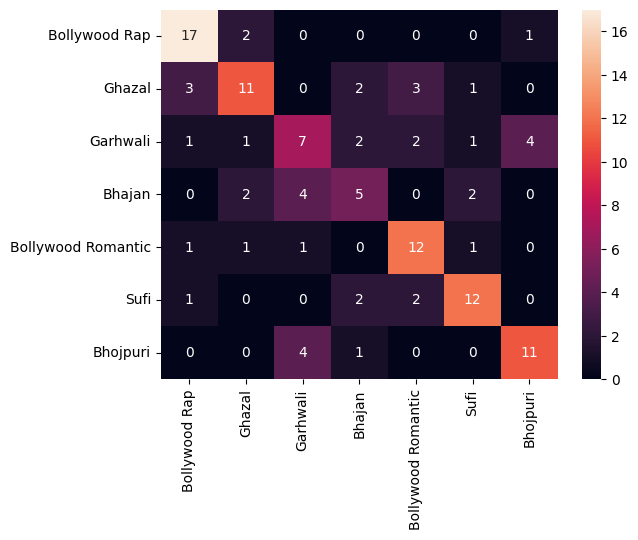

In [60]:
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


model = make_pipeline(PCA(9), StandardScaler(), SVC(C = 5, gamma='auto', kernel = "rbf", break_ties = True))

new_X_train = get_X_as_per_features(X_train, (0, 1, 2, 3, 4, 6, 8, 10, 11))
new_X_test = get_X_as_per_features(X_test, (0, 1, 2, 3, 4, 6, 8, 10, 11))

model.fit(new_X_train, y_train)

predicted = model.predict(new_X_test)

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, annot=True, xticklabels = labels, yticklabels = labels)


In [62]:
# saving the model
import pickle
model_name = "svm.pickle"

file_name = open("./weights/" + model_name, 'wb') 

pickle.dump(model, file_name)# saving the model

**GRADIENT BOOSTING**

0.6833333333333333


<AxesSubplot:>

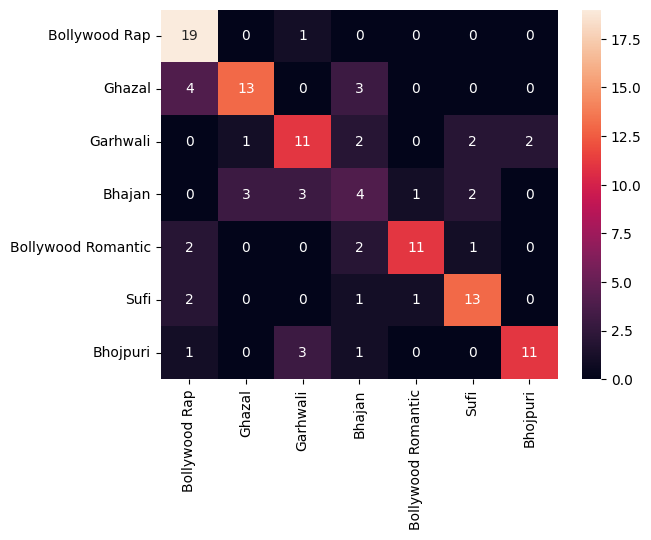

In [63]:
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier



model = GradientBoostingClassifier(n_estimators = 100)

new_X_train = get_X_as_per_features(X_train, (0, 1, 2, 4, 7, 8, 9, 11))
new_X_test = get_X_as_per_features(X_test, (0, 1, 2, 4, 7, 8, 9, 11))

model.fit(new_X_train, y_train)

predicted = model.predict(new_X_test)

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, annot=True, xticklabels = labels, yticklabels = labels)


In [65]:
# saving the model
import pickle
model_name = "Gradient_boosting.pickle"

file_name = open("./weights/" + model_name, 'wb') 

pickle.dump(model, file_name)

**KNN**

0.6


<AxesSubplot:>

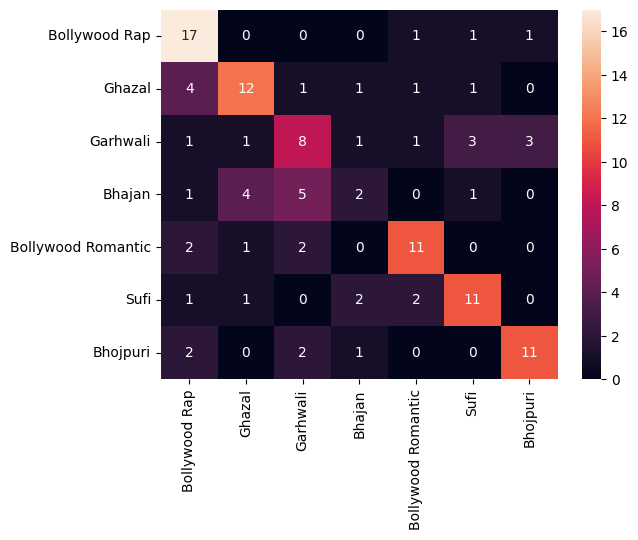

In [66]:
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7, n_jobs=4))

new_X_train = get_X_as_per_features(X_train, (0, 1, 2, 3, 4, 6, 7, 8, 11))
new_X_test = get_X_as_per_features(X_test, (0, 1, 2, 3, 4, 6, 7, 8, 11))

model.fit(new_X_train, y_train)

predicted = model.predict(new_X_test)

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, annot=True, xticklabels = labels, yticklabels = labels)


In [68]:
# saving the model
import pickle
model_name = "kNN.pickle"

file_name = open("./weights/" + model_name, 'wb') 

pickle.dump(model, file_name)

**LOGISTIC REGRESSION**

0.7083333333333334


<AxesSubplot:>

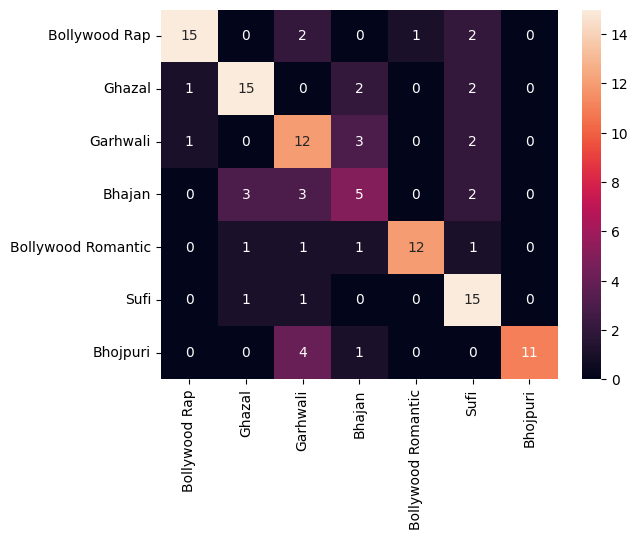

In [16]:
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



model = make_pipeline(StandardScaler(), LogisticRegression())
0, 1, 2, 4, 6, 10, 11
new_X_train = get_X_as_per_features(X_train, (0, 1, 2, 4, 5, 6, 8, 10, 11))
new_X_test = get_X_as_per_features(X_test, (0, 1, 2, 4, 5, 6, 8, 10, 11))

model.fit(new_X_train, y_train)

predicted = model.predict(new_X_test)

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, annot=True, xticklabels = labels, yticklabels = labels)


In [ ]:
# saving the model
import pickle
model_name = "logistic_regression.pickle"

file_name = open("./weights/" + model_name, 'wb') 

pickle.dump(model, file_name)# saving the model
import pickle
model_name = "logistic_regression.pickle"

file_name = open("./weights/" + model_name, 'wb') 

pickle.dump(model, file_name)